<a href="https://colab.research.google.com/github/pontofio/Cours/blob/main/Copie_de_Notebook_3_SVM_Digits_Moons_Etudiant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡️ SVM – Digits & Jeux 2D
👨‍🏫 Professeur : Dr. Khalil HADDAOUI

**Problème concret** : OCR (Reconnaissance Optique de Caractères) de chiffres manuscrits (codes postaux, ...).  
**Objectifs** : comprendre marge maximale, effet de C et γ, et visualiser frontières.


## 🧭 Intuition SVM
On cherche un hyperplan qui **maximise la marge** entre classes.  
Paramètres : **C** (tolérance aux erreurs) et **γ** (noyau RBF : portée locale de l'influence).

- Grand C → marge petite, peu d'erreurs sur train (risque overfit).  
- Grand γ → frontières très sinueuses (risque overfit).


In [ ]:
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Digits
X, y = load_digits(return_X_y=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


LinearSVC acc: 0.9555555555555556
Best params: {'clf__C': 2, 'clf__gamma': 0.01}
RBF acc: 0.9805555555555555


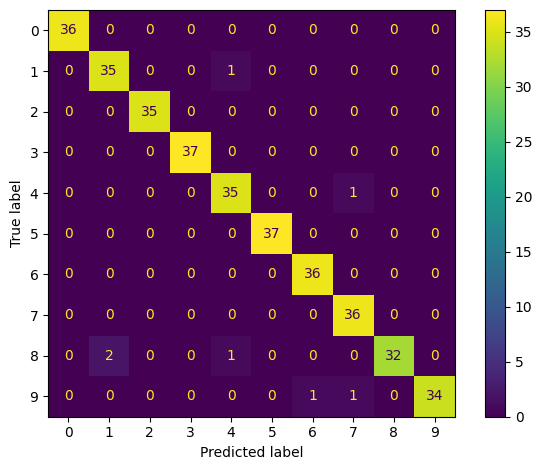

In [ ]:
# TODO: baseline LinearSVC (avec StandardScaler)
pipe_lin = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LinearSVC(dual=False))
])
# TODO: fit + accuracy
pipe_lin.fit(Xtr, ytr)
accuracy_score(yte, pipe_lin.predict(Xte))

print("LinearSVC acc:", accuracy_score(yte, pipe_lin.predict(Xte)))

# TODO: SVC RBF + GridSearch (C, gamma)
pipe_rbf = Pipeline([("scaler", StandardScaler()), ("clf", SVC(kernel="rbf"))])
param_grid = {"clf__C":[0.5,1,2], "clf__gamma":[1e-3,1e-2,1e-1]}
gs = GridSearchCV(pipe_rbf, param_grid, cv=3, n_jobs=-1)
# TODO: gs.fit(...)
gs.fit(Xtr, ytr)

print("Best params:", gs.best_params_)

yhat = gs.best_estimator_.predict(Xte)
print("RBF acc:", accuracy_score(yte, yhat))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(yte, yhat)
plt.tight_layout(); plt.show()


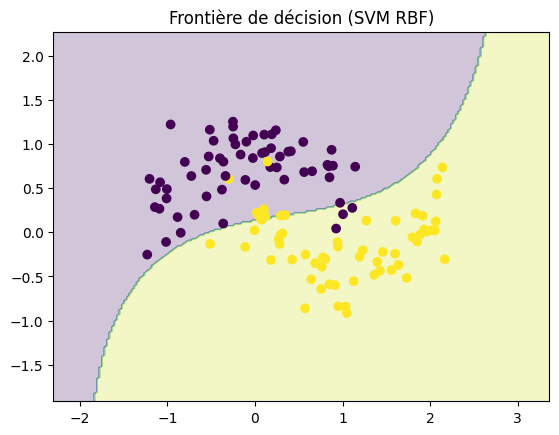

In [ ]:
# Visualisation frontières sur jeu 2D
Xm, ym = make_moons(n_samples=400, noise=0.2, random_state=42)
Xtrm, Xtem, ytrm, ytem = train_test_split(Xm, ym, test_size=0.3, random_state=42, stratify=ym)

pipe = Pipeline([("scaler", StandardScaler()), ("clf", SVC(kernel="rbf", C=1.0, gamma=0.1))])
pipe.fit(Xtrm, ytrm)

# Grille pour la frontière
xx, yy = np.meshgrid(np.linspace(Xm[:,0].min()-1, Xm[:,0].max()+1, 200),
                     np.linspace(Xm[:,1].min()-1, Xm[:,1].max()+1, 200))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(Xtem[:,0], Xtem[:,1], c=ytem)
plt.title("Frontière de décision (SVM RBF)")
plt.show()


### ✅ À retenir
- **Toujours scaler** avant SVM.
- Ajuster **C** et **γ** (validation croisée).
- Visualiser frontières sur jeux 2D pour l'intuition.
